# Logistic Regression

Consider a *binary classification* problem where, given a dataset of $m$ training examples with $n$ features per sample, the target or output variable is a binary label $y^{(i)}\in\{0,1\}$. A suitable model for this problem is a logistic regression model [as opposed to linear regression](#why-not-linreg).

Logistic regression achieves this through the use of a nonlinear function known as the *logistic function* denoted here as $\sigma(z)$, also known as the *sigmoid* function defined as,
$$
\sigma(z)=\frac{1}{1+e^{-z}}
$$
where for every $z\in\mathbb{R}$, $0<\sigma(z)<1$

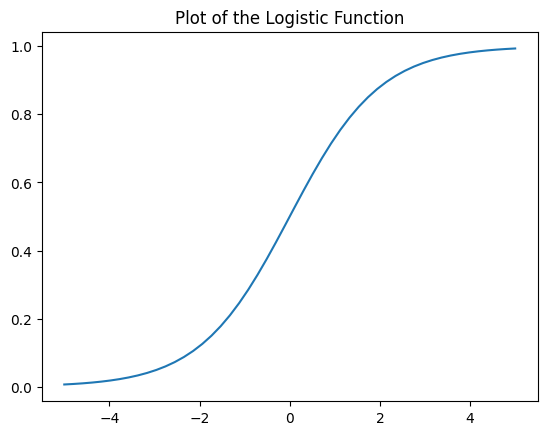

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-5, 5)
sig_z = 1 / (1 + np.exp(-z))
plt.title('Plot of the Logistic Function')
plt.plot(z, sig_z)
plt.show()

The input to the logistic function is calculated as a linear combination of weights $w$ and the input features $x^{(i)}$, resulting in
$$
\sigma(z)=\frac{1}{1+e^{-(w^\top x)}}
$$

One interpretation of the output of the logistic function is that it is the probability that the class is the positive class given the input features $x^{(i)}$, i.e,
$$
P(y=1\mid x=x^{(i)})=\hat{y}=\frac{1}{1+e^{-(w^\top x)}}
$$

## Cost Function for Logistic Regression

The goal is to maximize the output of $\sigma(z)$ whenever $y^{(i)}=1$ and minimize $\sigma(z)$ whenever $y^{(i)}=0$. Given the probabilistic interpretation of the logistic function. The optimal parameters $w$ and $b$ can be found as follows:

The probability that the output is the positive or negative class given the input features $x^{(i)}$ can be expressed as,
$$
P(y\mid x)=\hat{y}^y\cdot(1-\hat{y})^{(1-y)}
$$
to see that this is valid, suppose the true label $y=1$,
$$
P(y=1\mid x)=\hat{y}\cdot(1-1)^{(1-1)}=\hat{y}
$$
and if the true label $y=0$,
$$
P(y=0\mid x)=\hat{y}^0\cdot(1-\hat{y})^{(1-0)}=1-\hat{y}
$$

Therefore, the goal is to maximize $\hat{y}$ for this function.

Because the $\log(x)$ is a strictly increasingly monotic function, any maximum of $x$ is also a maximum of $\log(x)$. Therefore, the equation can be written as

$$
\begin{align*}
\log(P(y\mid x))
&=\log\left(\hat{y}^{y}\cdot(1-\hat{y})^{(1-y)}\right)\\
&=\log\left(\hat{y}^y\right)+\log\left((1-\hat{y})^{(1-y)}\right)\\
&=y\log(\hat{y})+(1-y)\log(1-\hat{y})
\end{align*}
$$

Maximizing $P(y\mid x)$ is equivalent to minimizing the $-P(y\mid x)$. This is also known as the *binary cross-entropy loss* function. 
$$
L(\hat{y},y)=-\left[y\log(\hat{y})+(1-y)\log(1-\hat{y})\right]
$$

The cost is simply defined similar to before
$$
J(w)=\frac{1}{m}\sum_{i=1}^{m}L(\hat{y},y)
$$

## Gradient Descent

Given the formula for the cost function $J(w)$, the gradient of the cost function w.r.t the weights $\nabla_{w}J(w)$ can be calculated similarly as before:
$$
\nabla_{w}J(w)=\begin{bmatrix}\frac{\partial J(w)}{\partial w_1} & \dots & \frac{\partial J(w)}{\partial w_n}\end{bmatrix}^\top
$$

To simplify the calculation of the derivative $\frac{\partial J(w)}{\partial w_j}$, it is helpful to note that by the chain rule,
$$
\frac{\partial J(w)}{\partial w_j}=\sum_{i=1}^{m}\frac{\partial J(w)}{\partial\hat{y}^{(i)}}\cdot\frac{\partial \hat{y}^{(i)}}{\partial w_j}
$$
The partial derivative of the loss w.r.t a particular output $\hat{y}^{(l)}$ for $l\in[1,\ldots,m]$ is,
$$
\begin{align*}
\frac{\partial J(w)}{\partial\hat{y}^{(l)}}
&=\frac{\partial}{\partial\hat{y}^{(l)}}\left(\frac{1}{m}\sum_{i=1}^{m}L(\hat{y}^{(i)},y^{(i)})\right)\\
&=\frac{1}{m}\sum_{i=1}^{m}\left(\frac{\partial}{\partial\hat{y}^{(l)}}L(\hat{y}^{(i)},y^{(i)})\right)\\
&=\frac{1}{m}\sum_{i=1}^{m}\left\{\frac{\partial}{\partial\hat{y}^{(l)}}\left[-\left(y^{(i)}\log(\hat{y}^{(i)})+(1-y^{(i)})\log(1-\hat{y}^{(i)})\right)\right]\right\}\\
&=\frac{1}{m}-\left[\frac{y^{(l)}}{\hat{y}^{(l)}}+\frac{(1-y^{(l)})}{(1-\hat{y}^{(l)})}(-1)\right]\\
&=\frac{1}{m}-\left(\frac{y^{(l)}(1-\hat{y}^{(l)})-\hat{y}(1-y^{(l)})}{\hat{y}^{(l)}(1-\hat{y}^{(l)})}\right)\\
&=\frac{1}{m}-\left(\frac{y^{(l)}-y^{(l)}\hat{y}^{(l)}-\hat{y}^{(l)}+y^{(l)}\hat{y}^{(l)}}{\hat{y}^{(l)}(1-\hat{y}^{(l)})}\right)\\
&=\frac{1}{m}\left(\frac{\hat{y}^{(l)}-y^{(l)}}{\hat{y}^{(l)}(1-\hat{y}^{(l)})}\right)\\
&=\frac{1}{m}\left(\frac{\hat{y}^{(l)}-y^{(l)}}{\hat{y}^{(l)}(1-\hat{y}^{(l)})}\right)\\
\end{align*}
$$

The partial derivative of the predicted value $\hat{y}^{(i)}$ for $i\in[1,\ldots,m]$ w.r.t a particular weight $w_j$ for $j\in[1,\ldots,n]$ is,
$$
\begin{align*}
\frac{\partial\hat{y}^{(i)}}{\partial w_j}
&=\frac{\partial\sigma(z)}{\partial z}\cdot\frac{\partial z}{\partial w_j}
\end{align*}
$$

The first factor, i.e., the derivative of the logistic function is w.r.t $z$ is,
$$
\begin{align*}
\frac{\partial\sigma(z)}{\partial z}
&=\frac{\partial}{\partial z}\left(\frac{1}{1+e^{-z}}\right)\\
&=-\frac{1}{(1+e^{-z})^2}\left(e^{-z}\right)\left(-1\right)\\
&=\frac{e^{-z}}{(1+e^{-z})^2}\\
&=\frac{1-1+e^{-z}}{(1+e^{-z})^2}\\
&=\frac{1+e^{-z}}{(1+e^{-z})^2}-\frac{1}{(1+e^{-z})^2}\\
&=\frac{1}{1+e^{-z}}\left(\frac{1+e^{-z}}{1+e^{-z}}-\frac{1}{1+e^{-z}}\right)\\
&=\frac{1}{1+e^{-z}}\left(1-\frac{1}{1+e^{-z}}\right)\\
&=\sigma(z)(1-\sigma(z))=\hat{y}(1-\hat{y})
\end{align*}
$$

The partial derivative of $z$ w.r.t to a particular weight $w_j$ is,
$$
\frac{\partial z}{w_j}=\frac{\partial}{\partial w_j}(w^\top x)=x_j
$$

Combining all the derivatives for the cost function,
$$
\begin{align*}
\frac{\partial J(w)}{\partial w_j}
&=\sum_{i=1}^{m}\frac{1}{m}\left(\frac{\hat{y}^{(i)}-y^{(i)}}{\hat{y}^{(i)}(1-\hat{y}^{(i)})}\right)\cdot\hat{y}^{(i)}(1-\hat{y}^{(i)})\cdot x^{(i)}_j\\
&=\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)\cdot x^{(i)}_j
\end{align*}
$$

## Vectorized Implementation

Given the design matrix $X$ and parameters $w$ (with $b$ included) defined similarly as before, a vectorized implementation of $\nabla_{w}J(w)$ can be calculated as follows:
$$
X=
    \begin{bmatrix}
        x^{(1)}_1 & \dots  & x^{(m)}_1 \\
        \vdots    & \ddots & \vdots    \\
        x^{(1)}_n & \dots  & x^{(m)}_n \\
        1 & \dots & 1
    \end{bmatrix}
    \qquad
    w=\begin{bmatrix}w_1\\\vdots\\w_n\\b\end{bmatrix}
$$

A matrix-vector product would then yield the intermediate variable $Z$ for the logistic function $\sigma(Z)$ (note that $\sigma(Z)$ operates component-wise, i.e, $\hat{Y}_i=\sigma(Z_i)$ for $i\in[1,\ldots,m]$)
$$
Z=w^\top X\qquad\text{and}\qquad\hat{Y}=\sigma(Z)
$$

The residuals $\hat{Y}-Y$ can be obtained simply by subtracting the two vectors. After which, the vector can be transposed leading to,
$$
    (\hat{Y}-Y)^\top=\begin{bmatrix}\hat{y}^{(1)}-y^{(1)}\\\vdots\\\hat{y}^{(m)}-y^{(m)}\end{bmatrix}
$$
Recall that the design matrix $X$ is defined as
$$
X=
    \begin{bmatrix}
        x^{(1)}_1 & \dots  & x^{(m)}_1 \\
        \vdots    & \ddots & \vdots    \\
        x^{(1)}_n & \dots  & x^{(m)}_n \\
        1 & \dots & 1
    \end{bmatrix}
    \qquad
$$
With this, the gradient $\nabla_{w}J(w)$ can simply be calculated as a matrix-vector product,
$$
    \nabla_{w}J(w)=\frac{X(\hat{Y}-Y)^\top}{m}
$$

## Implementation

The code below shows the logistic regression model operating on a classification dataset from the `sklearn` package

In [2]:
from sklearn.datasets import make_classification

In [3]:
X_data, Y_data = make_classification(n_samples     = 100, 
                                     n_features    = 2, 
                                     n_informative = 1, 
                                     n_redundant   = 0,  
                                     n_clusters_per_class = 1,
                                     random_state  = 69)
X_data = X_data.T
Y_data = Y_data.reshape(1, -1) 

(X_data.shape, Y_data.shape)

((2, 100), (1, 100))

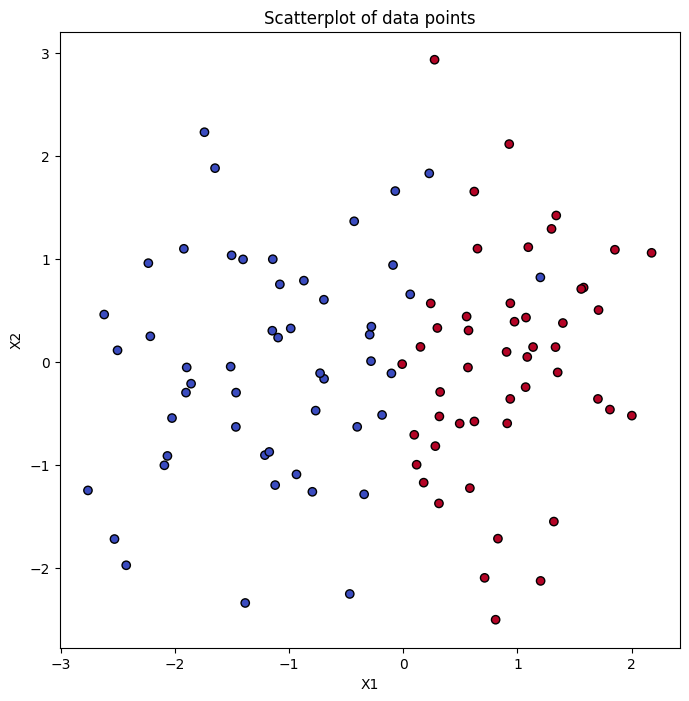

In [4]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(x = X_data.T[:, 0], y = X_data.T[:, 1], c = Y_data, cmap = 'coolwarm', edgecolors='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatterplot of data points')
plt.show()

In [5]:
def calc_optimal_params_grad_descent(train_X, train_Y, num_epochs, learning_rate):
    # Additional column for the bias
    bias_row = np.full((1, train_X.shape[1]), 1)
    train_X  = np.row_stack([train_X, bias_row ])
    
    n, m = train_X.shape
    w    = np.random.randn(n, 1)
    
    loss_hist = np.zeros(num_epochs)
    
    for i in range(num_epochs):
        Z_val  = np.dot(w.T, train_X)
        Y_pred = 1 / (1 + np.exp(-Z_val))
        
        bce_loss = np.mean((Y_pred - train_Y) ** 2) / 2.0
        loss_hist[i] = bce_loss
        
        # Calculate gradients
        grad_W = np.dot(train_X, (Y_pred - train_Y).T) / m
        
        # Update the weights
        w = w - (learning_rate * grad_W)
        
    return w, loss_hist

weights, loss_hist = calc_optimal_params_grad_descent(X_data, Y_data, 100, 0.25)

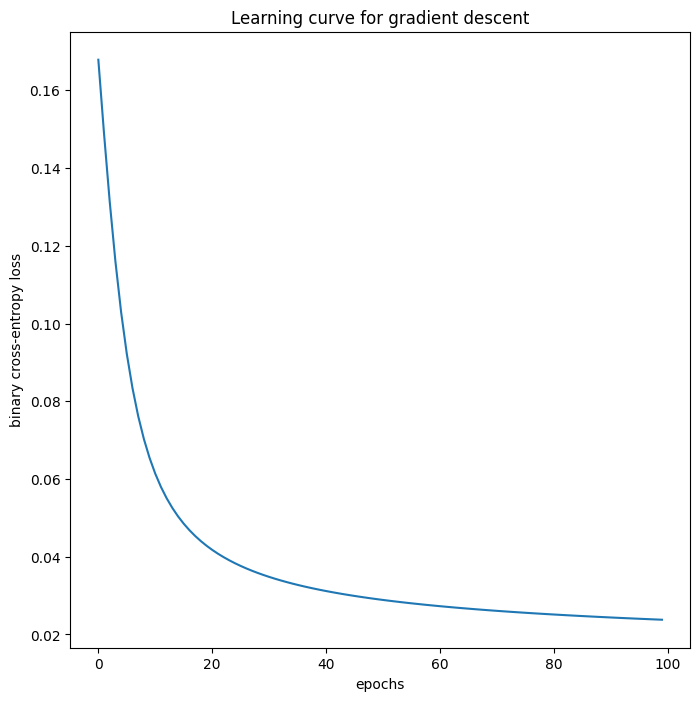

In [6]:
fig = plt.figure(figsize = (8, 8))
plt.title('Learning curve for gradient descent')
plt.xlabel('epochs')
plt.ylabel('binary cross-entropy loss')
plt.plot(loss_hist)
plt.show()

In [7]:
weights

array([[ 2.70279869],
       [-0.28244935],
       [ 0.04793148]])

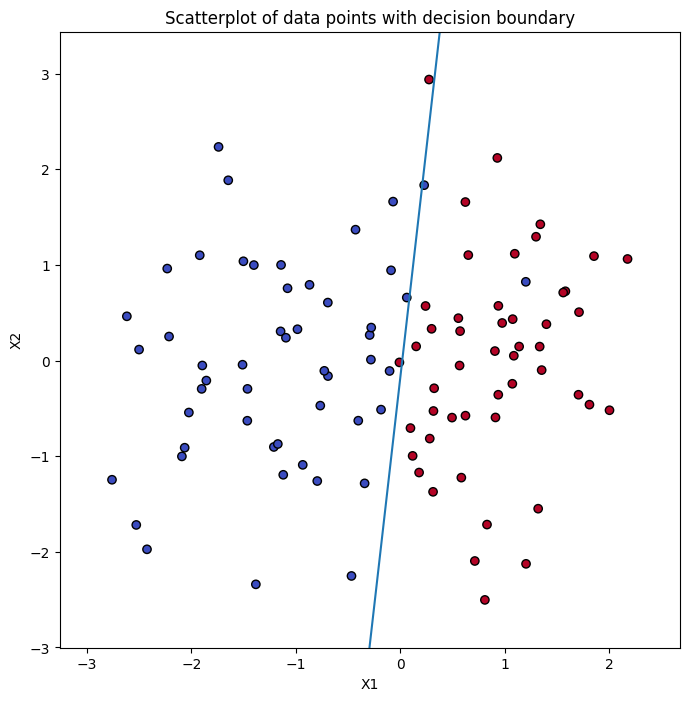

In [8]:
fig = plt.figure(figsize=(8, 8))
x1t = np.linspace(X_data.T[:, 1].min(), X_data.T[:, 1].max())
x2t = (weights[2] - weights[0] * x1t) / weights[1]

plt.scatter(x = X_data.T[:, 0], y = X_data.T[:, 1], c = Y_data, cmap = 'coolwarm', edgecolors='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatterplot of data points with decision boundary')
plt.plot(x1t, x2t)
plt.ylim(X_data.T[:, 1].min() - 0.5, X_data.T[:, 1].max() + 0.5)
plt.xlim(X_data.T[:, 0].min() - 0.5, X_data.T[:, 0].max() + 0.5)
plt.show()

## Why not use linear regression for binary classification?<a id="why-not-linreg"></a>
While it is possible to attempt a solution using normal linear regression, there are significant fallbacks to this approach. One is that linear regression outputs a continuous range of values outside of $0$ or $1$. But even if that were addressed through a threshold value, there may still be problems given certain datasets. A univariate example is shown below.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

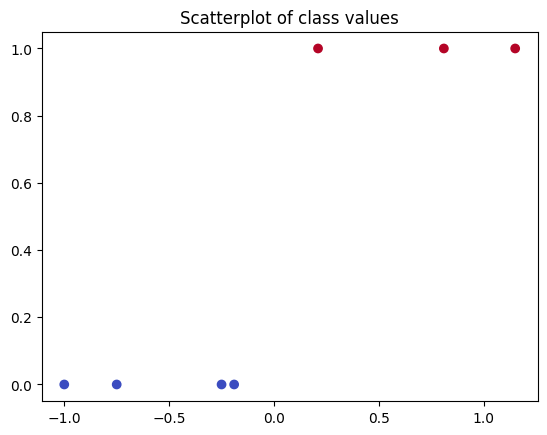

In [10]:
test_x = np.array([ -1.00, -0.75, -0.25, -0.19, 0.21, 0.81, 1.15 ])
test_y = np.array([  0.00,  0.00,  0.00,  0.00, 1.00, 1.00, 1.00 ])

plt.title('Scatterplot of class values')
plt.scatter(test_x, test_y, c = test_y, cmap = 'coolwarm')
plt.show()

In [11]:
def calc_optimal_params_system_of_eq(x_train, y_train):
    m = x_train.shape[0]

    w_denom = (m * np.sum(x_train ** 2)) - (np.sum(x_train) ** 2)
    w_numer = (m * np.dot(y_train, x_train)) - (np.sum(y_train) * np.sum(x_train))

    w_new = w_numer / w_denom
    w_new

    b_numer = (np.sum(y_train) * np.sum(x_train ** 2)) - (np.dot(y_train, x_train) * np.sum(x_train))
    b_denom = (m * np.sum(x_train ** 2)) - (np.sum(x_train)) ** 2

    b_new = b_numer / b_denom

    return (w_new, b_new)

It is possible to attempt to fit a straight line to the data (using the direct method from the univariate linear regression). Choosing a threshold of, say, $t=0.5$ the samples can be labelled as follows
$$
f(x^{(i)})=\begin{cases}
0 & wx+b\leq t\\
1 & wx+b> t\\
\end{cases}
$$

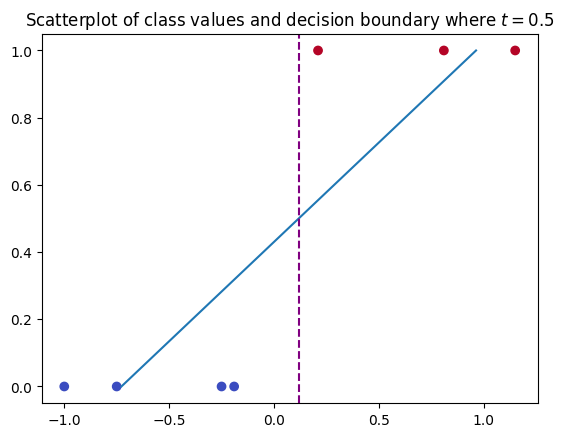

In [12]:
w_se, b_se = calc_optimal_params_system_of_eq(test_x, test_y)

line_x = np.linspace(-b_se/w_se, (1-b_se) / w_se)
line_y = w_se * line_x + b_se

threshold      = 0.5
decision_bound = (threshold - b_se) / w_se

plt.title('Scatterplot of class values and decision boundary where $t=0.5$')
plt.scatter(test_x, test_y, c = test_y, cmap = 'coolwarm')
plt.plot(line_x, line_y)
plt.axvline(decision_bound, linestyle = '--', color = 'purple')
plt.show()

While the linear regression model may seem to have performed well for this dataset, consider the addition of other datapoints farther out. These influence the parameters of the best fit line and thus can cause misclassifications.

In [13]:
test_x = np.array([ -9.20,-7.30, -1.00, -0.75, -0.25, -0.19, 0.21, 0.81, 1.15, 9.3, 20.2 ])
test_y = np.array([  0.00, 0.00,   0.00,  0.00,  0.00,  0.00, 1.00, 1.00, 1.00, 1.0, 1.0 ])

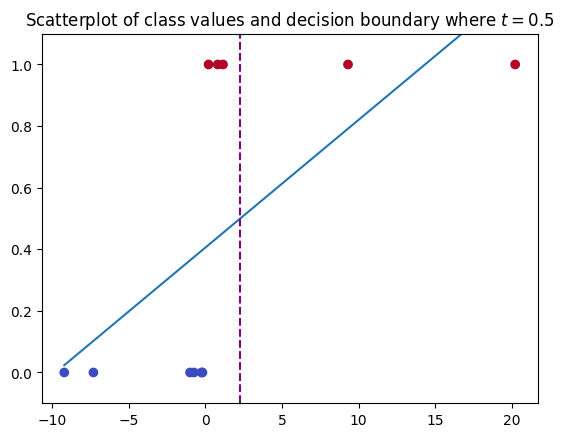

In [17]:
w_se, b_se = calc_optimal_params_system_of_eq(test_x, test_y)

line_x = np.linspace(test_x.min(), test_x.max())
line_y = w_se * line_x + b_se

threshold      = 0.5
decision_bound = (threshold - b_se) / w_se

plt.title('Scatterplot of class values and decision boundary where $t=0.5$')
plt.scatter(test_x, test_y, c = test_y, cmap = 'coolwarm')
plt.plot(line_x, line_y)
plt.ylim(-0.1, 1.1)
plt.axvline(decision_bound, linestyle = '--', color = 'purple')
plt.show()